In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib

In [6]:
df = pd.read_csv("../../../hw3/submission_template/data/pony_data/clean_dialog.csv")
df = df.loc[:,['title', 'pony']].apply(lambda x: x.astype(str).str.lower())
df

,title,pony
0,"friendship is magic, part 1",narrator
1,"friendship is magic, part 1",narrator
2,"friendship is magic, part 1",narrator and twilight sparkle
3,"friendship is magic, part 1",twilight sparkle
4,"friendship is magic, part 1",twinkleshine
...,...,...
36854,my little pony best gift ever,others
36855,my little pony best gift ever,alice
36856,my little pony best gift ever,others
36857,my little pony best gift ever,others


In [7]:
def check_word(name, forbidden):
    if set(str.split(name, " ")) & set(forbidden):
        return True
    else:
        return False

In [11]:
counts = df['pony'].value_counts()
df_count = pd.DataFrame()
df_count['name']= counts.index
df_count['counts'] = list(counts)

df_count = df_count[df_count['name'].apply(lambda x: not check_word(x, forbidden))]
#counts
#df_count
top_101 = list(df_count[0:101]['name'])
top_101

['twilight sparkle',
 'rainbow dash',
 'pinkie pie',
 'applejack',
 'rarity',
 'spike',
 'fluttershy',
 'apple bloom',
 'starlight glimmer',
 'sweetie belle',
 'scootaloo',
 'discord',
 'trixie',
 'princess celestia',
 'granny smith',
 'big mcintosh',
 'princess cadance',
 'maud pie',
 'princess luna',
 'sunburst',
 'shining armor',
 'thorax',
 'diamond tiara',
 'flim',
 'smolder',
 'spitfire',
 'flam',
 'zecora',
 'cheerilee',
 'gallus',
 'cutie mark crusaders',
 'sandbar',
 'ocellus',
 'cozy glow',
 'silverstream',
 'yona',
 'prince rutherford',
 'garble',
 'gilda',
 'zephyr breeze',
 'cranky doodle donkey',
 'rockhoof',
 'quibble pants',
 'young applejack',
 'daring do',
 'queen chrysalis',
 'lightning dust',
 'star swirl the bearded',
 'mayor mare',
 'sugar belle',
 'ember',
 'iron will',
 'mrs. cake',
 'tempest shadow',
 'sassy saddles',
 'snips',
 'lord tirek',
 'rumble',
 'silver spoon',
 'snails',
 'sludge',
 'cheese sandwich',
 'babs seed',
 'soarin',
 'pipsqueak',
 'gabby',
 

In [12]:
G = nx.Graph()
forbidden = ['others', 'ponies', 'and', 'all']
pony_prev = df['pony'][0]
title_prev = df['title'][0]

for i in range(1,len(df)):
    title = df['title'][i]
    pony = df['pony'][i]
    #print(pony)
    #print(title)
    if pony == pony_prev:
        pony_prev = pony
        title_prev = title
        continue
    if set(forbidden) & set(str.split(pony, " ")) or pony not in top_101:
        print(f'skip {pony}')
        pony_prev = None
        title_prev = title
        continue
    if title != title_prev:
        print('New episode started')
        pony_prev = pony
        title_prev = title
        continue
    if pony_prev != None:
        if G.has_edge(pony_prev, pony):
            G[pony_prev][pony]['weight'] = G[pony_prev][pony]['weight'] + 1
        else:
            G.add_edge(pony_prev, pony, weight=1)
    
    pony_prev = pony
    title_prev = title


skip narrator and twilight sparkle
skip twinkleshine
skip twinkleshine
skip ponies
New episode started
skip everypony
skip everypony
skip everypony
skip others
skip others
skip others
skip steven magnet
skip steven magnet
skip steven magnet
skip steven magnet
skip steven magnet
skip steven magnet
skip steven magnet
skip steven magnet
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip shadowbolt leader
skip everypony
skip twilight sparkle and rainbow dash
New episode started
skip applejack and twilight sparkle
skip rarity and pinkie pie
skip savoir fare
skip savoir fare
skip savoir fare
skip ponies
skip drizzle
skip others
skip daisy
skip shoeshine
skip ponies in unison
skip ponies in unison
skip others
New episode started
skip daisyjo
skip daisyjo
skip daisyjo
skip nurse redheart
skip nurse redheart
skip mule
skip daisy
skip ro

skip dr. horse
skip dr. fauna
skip dr. fauna
skip applejack and twilight sparkle
skip others
New episode started
skip main cast
skip other main cast
skip unicorns
skip others
skip others
skip shoeshine
skip applejack and fluttershy
skip main cast
skip choir
New episode started
skip others
skip daisy
skip apple family
skip foals
New episode started
skip main cast
skip main cast
skip nurse redheart
skip nurse redheart
skip nurse redheart
skip nurse redheart
skip pumpkin cake
skip pumpkin cake
skip pumpkin cake
skip pumpkin cake
skip pound cake
skip pound cake
skip pumpkin cake
New episode started
skip conductor
skip ponies
skip parcel post
skip cherry jubilee
skip cherry jubilee
skip cherry jubilee
skip cherry jubilee
skip cherry jubilee
skip cherry jubilee
skip coach ponies
skip others
New episode started
skip ponies
skip caramel
skip caramel
skip flim and flam
skip flim and flam
skip flim and flam
skip others
skip flim and flam
skip others
skip flim and flam
skip flim and flam
skip cro

skip conductor
skip conductor
skip conductor
skip conductor
skip conductor
skip conductor
New episode started
skip conductor
skip laurette
skip main cast
skip train conductor
skip twilight and cadance
skip golden hooves
skip crystal ponies
skip golden hooves
skip main cast
skip ms. harshwhinny
skip ms. harshwhinny
skip ms. harshwhinny
skip ms. harshwhinny
skip ms. harshwhinny
skip ms. harshwhinny
skip ms. harshwhinny
skip ms. harshwhinny
skip conductor
New episode started
skip others
skip davenport
skip others
skip others
skip rarity and rainbow dash
skip others
skip pinkie pie and applejack
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip twilight and fluttershy
skip twilight and fluttershy
skip others
skip others
skip crowd
skip others
skip others
skip others
skip others
skip main cast
skip others
skip choir
skip others
skip others
skip main cast and crowd
New episode started
skip others
skip train conductor
skip messeng

skip others
skip others
skip stinky bottom
skip stinky bottom
skip coco pommel
skip coco pommel
skip coco pommel
skip coco pommel
skip coco pommel
skip street pony
skip coco pommel
skip coco pommel
skip coco pommel
skip others
skip others
skip others
skip others
skip coco pommel
skip coco pommel
skip coco pommel
skip coco pommel
skip on stage
skip raspberry beret
skip coco pommel
skip others
skip raspberry beret
skip coco pommel
skip coco pommel
skip on stage
skip raspberry beret
skip on stage
skip others
skip blueberry curls
skip others
skip blueberry curls
skip others
skip on stage
skip on stage
skip others
skip raspberry beret
skip others
skip raspberry beret
skip others
skip raspberry beret
skip others
skip luckette
skip others
skip others
skip raspberry beret
skip others
skip pearly stitch
skip on stage
skip coco pommel
skip coco pommel
skip others
skip others
skip others
skip others
skip others
New episode started
skip apple bloom and applejack
skip booth barker
skip booth barker

skip party favor
New episode started
skip changeling
skip changeling
skip changeling girl
skip changeling 1
skip starlight glimmer and thorax
skip changeling 1
skip goofy changeling
skip cornicle
skip goofy changeling
skip cornicle
skip sunburst and twilight sparkle
skip guard 1
skip guard 2
New episode started
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip mane six
skip mane six
skip others
skip others
skip others
skip others
skip others
skip others
skip starlight glimmer and trixie
skip nurse redheart
skip nurse redheart
skip nurse redheart
skip flurry heart
skip flurry heart
skip spearhead
skip spearhead
skip spearhead
skip spearhead
skip salespony
skip flurry heart
skip spearhead
skip spearhead
skip nurse redheart
skip cherry fizzy
skip cherry fizzy
skip spearhead
skip spearhead
skip spearhead
skip others
skip rusty tenure
skip rusty tenure
skip pinkie pie and rarity
New episode started
skip dr. fauna
skip dr. fauna
skip flutter

New episode started
skip pony of shadows
skip pony of shadows
skip pony of shadows
skip pony of shadows
skip pony of shadows
skip somnambula
skip mage meadowbrook
skip flash magnus
skip somnambula
skip mistmane
skip somnambula
skip mage meadowbrook
skip flash magnus
skip flash magnus
skip mage meadowbrook
skip mage meadowbrook
skip flash magnus
skip mistmane
skip mage meadowbrook
skip somnambula
skip mage meadowbrook
skip somnambula
skip mistmane
skip mistmane
skip pony of shadows
skip pony of shadows
skip pony of shadows
skip stygian
skip stygian
skip stygian
skip stygian
skip mage meadowbrook
skip mistmane
skip grampa gruff
skip seaspray
skip choir
skip others
skip choir
skip main cast sans twilight sparkle
skip students
skip students
skip all sans twilight sparkle
skip pony
skip seaspray
skip grampa gruff
New episode started
skip grampa gruff
skip grampa gruff
skip others
skip others
skip grampa gruff
skip seaspray
skip seaspray
skip grampa gruff
skip rest of students
skip seaspray


skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip autumn blaze
skip rain shine
skip autumn blaze
skip others
skip others
New episode started
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip others
skip others
New episode started
skip others
skip others
skip others
skip others
skip others
New episode started
skip young six sans sandbar
skip blows
skip others
skip others
skip others
skip others
skip young six
skip rachel platten
skip others
skip others
skip others
skip others
skip others
skip apple cobbler
skip clear skies
skip female pony 2
skip others
skip others
skip mane five
skip others
skip rainbow dash and wonderbolts
skip crowd
skip others
skip fluttershy and bird whistle
skip applejack and apple family
skip apple family
skip rarity and spike
skip others
skip others
skip all
ski

{('twilight sparkle',
  'spike'): Text(0.08945917797896882, -0.049488834937642695, '1514'),
 ('twilight sparkle',
  'applejack'): Text(-0.00018722360721838, -0.012870544073261454, '771'),
 ('twilight sparkle',
  'apple bloom'): Text(-0.010261499260801402, 0.08806813867705719, '102'),
 ('twilight sparkle',
  'rainbow dash'): Text(0.0312642863363846, -0.0435160532170815, '895'),
 ('twilight sparkle',
  'rarity'): Text(-3.894617956742841e-05, -0.029569119546563324, '649'),
 ('twilight sparkle',
  'fluttershy'): Text(0.01382199451282767, -0.05246180475511526, '677'),
 ('twilight sparkle',
  'pinkie pie'): Text(-0.003848932757860607, -0.08043316626983536, '918'),
 ('twilight sparkle',
  'mayor mare'): Text(-0.18183920083746197, -0.022919263990746334, '18'),
 ('twilight sparkle',
  'nightmare moon'): Text(0.3248157937359995, -0.22226382283890395, '27'),
 ('twilight sparkle',
  'princess celestia'): Text(0.07354531565006256, -0.09826751158734595, '260'),
 ('twilight sparkle',
  'mrs. cake'): 

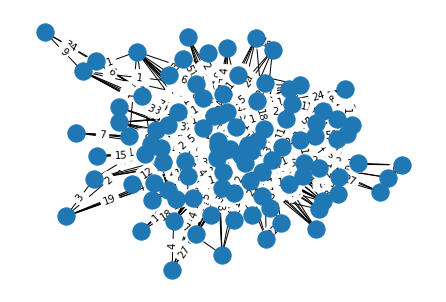

In [13]:
pos=nx.spring_layout(G)
nx.draw(G,pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

In [85]:
js = {'apple':3}
js.items()

dict_items([('apple', 3)])

In [14]:
for speaker in G.nodes():
    print(speaker)
    print(G.degree(speaker))

twilight sparkle
78
spike
61
applejack
68
granny smith
28
apple bloom
42
rainbow dash
72
rarity
61
fluttershy
57
pinkie pie
63
mayor mare
18
nightmare moon
8
princess celestia
27
princess luna
23
big mcintosh
24
sweetie drops
12
mrs. cake
16
mr. cake
9
gilda
7
snails
11
snips
13
trixie
19
zecora
14
cheerilee
17
diamond tiara
15
silver spoon
11
scootaloo
35
sweetie belle
32
hoity toity
4
soarin
7
spitfire
13
cutie mark crusaders
21
rover
3
photo finish
8
braeburn
7
young applejack
4
young rainbow dash
6
discord
25
pipsqueak
13
fancy pants
4
filthy rich
10
derpy
6
flim
15
flam
11
daring do
7
matilda
7
cranky doodle donkey
6
iron will
8
garble
6
bulk biceps
13
rumble
6
shining armor
18
princess cadance
19
queen chrysalis
11
babs seed
9
lightning dust
7
ms. peachbottom
7
dr. caballeron
5
goldie delicious
6
cheese sandwich
4
maud pie
14
lord tirek
13
double diamond
8
starlight glimmer
46
sugar belle
16
trouble shoes
5
prince rutherford
15
moon dancer
3
sassy saddles
4
sunburst
19
princess e

In [15]:
la = list(labels.items())
la.sort(key = lambda x: -x[1])
la

[(('twilight sparkle', 'spike'), 1514),
 (('twilight sparkle', 'pinkie pie'), 918),
 (('twilight sparkle', 'rainbow dash'), 895),
 (('twilight sparkle', 'applejack'), 771),
 (('applejack', 'rarity'), 730),
 (('rainbow dash', 'pinkie pie'), 696),
 (('twilight sparkle', 'fluttershy'), 677),
 (('applejack', 'rainbow dash'), 666),
 (('twilight sparkle', 'rarity'), 649),
 (('applejack', 'pinkie pie'), 569),
 (('rainbow dash', 'fluttershy'), 530),
 (('rainbow dash', 'rarity'), 506),
 (('rarity', 'fluttershy'), 492),
 (('apple bloom', 'scootaloo'), 487),
 (('rarity', 'pinkie pie'), 483),
 (('apple bloom', 'sweetie belle'), 467),
 (('scootaloo', 'sweetie belle'), 440),
 (('twilight sparkle', 'starlight glimmer'), 432),
 (('applejack', 'apple bloom'), 428),
 (('applejack', 'fluttershy'), 389),
 (('fluttershy', 'pinkie pie'), 340),
 (('trixie', 'starlight glimmer'), 338),
 (('spike', 'rarity'), 326),
 (('rarity', 'sweetie belle'), 288),
 (('twilight sparkle', 'princess celestia'), 260),
 (('spik

In [16]:
js = {}
for speaker1 in top_101:
    js[speaker1] = {}
    for speaker2 in top_101:
        if speaker1 == speaker2: continue
        try:
            js[speaker1][speaker2] = labels[(speaker1, speaker2)]
        except KeyError as err:
            try:
                js[speaker1][speaker2] = labels[(speaker2, speaker1)]
            except KeyError as err:
                continue

In [103]:
labels[('pinkie pie','twilight sparkle')]

KeyError: ('pinkie pie', 'twilight sparkle')

In [21]:
js

{'twilight sparkle': {'rainbow dash': 895,
  'pinkie pie': 918,
  'applejack': 771,
  'rarity': 649,
  'spike': 1514,
  'fluttershy': 677,
  'apple bloom': 102,
  'starlight glimmer': 432,
  'sweetie belle': 65,
  'scootaloo': 44,
  'discord': 149,
  'trixie': 69,
  'princess celestia': 260,
  'granny smith': 2,
  'big mcintosh': 11,
  'princess cadance': 143,
  'maud pie': 16,
  'princess luna': 88,
  'sunburst': 40,
  'shining armor': 120,
  'thorax': 9,
  'diamond tiara': 9,
  'flim': 16,
  'smolder': 15,
  'spitfire': 7,
  'flam': 15,
  'zecora': 57,
  'cheerilee': 13,
  'gallus': 16,
  'cutie mark crusaders': 17,
  'sandbar': 11,
  'ocellus': 7,
  'cozy glow': 17,
  'silverstream': 13,
  'yona': 9,
  'prince rutherford': 13,
  'garble': 10,
  'zephyr breeze': 4,
  'rockhoof': 36,
  'daring do': 1,
  'queen chrysalis': 13,
  'lightning dust': 2,
  'star swirl the bearded': 37,
  'mayor mare': 18,
  'sugar belle': 7,
  'ember': 11,
  'iron will': 25,
  'mrs. cake': 9,
  'tempest sha

In [22]:
import json
f = open('../data/try1.json', 'w')
json.dump(js, f, indent = 4)
f.close()

In [177]:
#top3 most connected
js_connection = {}
for speaker in js:
    js_connection[speaker]=len(js[speaker].items())
sorted_l = list(js_connection.items())
sorted_l.sort(key=lambda x: -x[1])
top3_edges = [t[0] for t in sorted_l][0:3]
top3_edges


['twilight sparkle', 'rainbow dash', 'applejack']

In [169]:
#top3 sum of weights
js_weights = {}
for speaker in js:
    js_weights[speaker]=sum(map(lambda x: x[1], js[speaker].items()))

sorted_w = list(js_weights.items())
sorted_w.sort(key=lambda x: -x[1])
top3_weights = [t[0] for t in sorted_w][0:3]
top3_weights

['twilight sparkle', 'rainbow dash', 'applejack']

In [171]:
#top3 centrality betweenness
bc = nx.betweenness_centrality(G)
bc

{'twilight sparkle': 0.15638394378786105,
 'spike': 0.07899104162741868,
 'applejack': 0.1080215148217112,
 'granny smith': 0.02629643686581441,
 'apple bloom': 0.03295195910766955,
 'rainbow dash': 0.14008522353032082,
 'rarity': 0.07044272075385766,
 'fluttershy': 0.053452035340405345,
 'pinkie pie': 0.08397087539088101,
 'mayor mare': 0.0032928980564101984,
 'nightmare moon': 0.00014486355395446304,
 'princess celestia': 0.0070482361711743675,
 'princess luna': 0.0023287267850394876,
 'big mcintosh': 0.004162540505775727,
 'sweetie drops': 0.0010143647776019885,
 'mrs. cake': 0.0008107960922655181,
 'mr. cake': 1.2626262626262626e-05,
 'gilda': 0.0,
 'snails': 0.0001272004779654584,
 'snips': 0.00045753697561461745,
 'trixie': 0.008487517227596404,
 'zecora': 0.0006123991755085298,
 'cheerilee': 0.0010859290216882922,
 'diamond tiara': 0.0011637084275382087,
 'silver spoon': 0.00042267359953815294,
 'scootaloo': 0.02317449990101321,
 'sweetie belle': 0.015726054069596804,
 'hoity to

In [174]:
sorted_bc = list(bc.items())
sorted_bc.sort(key=lambda x: -x[1])
top3_bc = [t[0] for t in sorted_bc][0:3]
top3_bc
#sorted_bc

['twilight sparkle', 'rainbow dash', 'applejack']

In [175]:
stat = {}
stat["most_connected_by_num"] = top3_edges
stat["most_connected_by_weight"] = top3_weights
stat["most_central_by_betweenness"] = top3_bc
stat

{'most_connected_by_num': ['twilight sparkle', 'rainbow dash', 'applejack'],
 'most_connected_by_weight': ['twilight sparkle', 'rainbow dash', 'applejack'],
 'most_central_by_betweenness': ['twilight sparkle',
  'rainbow dash',
  'applejack']}